In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import files
from google.colab import files
uploaded = files.upload()

Saving capstone_data_2_all_F18_1.xlsx to capstone_data_2_all_F18_1.xlsx


In [3]:
data = pd.read_excel('capstone_data_2_all_F18_1.xlsx')

In [4]:
data.head

<bound method NDFrame.head of           F1        F2        F3  ...     F22       F23  Y_variable
0   0.029883  0.063077 -0.008567  ...  0.2879  0.314879           1
1   0.193864  0.195109  0.005479  ...  0.1455  0.157838           1
2   0.114314  0.044079  0.001485  ...  0.1445  2.337801           1
3   0.143455  0.186251 -0.008711  ...  0.1956  0.607799           1
4   0.435331  0.345302  0.009070  ...  0.1331 -0.445824           1
..       ...       ...       ...  ...     ...       ...         ...
80  0.047659  0.059297 -0.027108  ...  0.0423 -0.660377           0
81  0.051340  0.011448 -0.027950  ...  0.0234  0.941981           0
82  0.097115  0.020825 -0.028649  ...  0.0512  0.399070           0
83 -0.028368  0.013274 -0.007168  ... -0.0278  0.107315           0
84 -0.010862  0.003858 -0.016120  ... -0.0488 -0.136637           0

[85 rows x 24 columns]>

In [ ]:
data.info()

In [5]:
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,Y_variable
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.115330,0.105839,-0.007073,-0.009491,-0.000143,0.010261,-0.015803,-0.002827,0.081159,0.137894,0.092742,0.136702,0.099934,0.134561,0.108671,0.203682,0.016994,0.549906,0.116336,0.249785,0.055259,0.121981,0.557585,0.670588
std,0.075085,0.069176,0.014840,0.039793,0.013177,0.135034,0.069337,0.013440,0.388031,0.127286,0.059456,0.121392,0.062045,0.091608,0.130252,0.165718,0.024251,1.378728,0.161659,0.920587,0.165545,0.104468,0.816278,0.472789
min,-0.028368,0.003858,-0.075658,-0.107694,-0.039090,-0.500699,-0.282522,-0.049000,-0.065624,-0.616377,-0.026176,-0.206300,-0.027900,-0.047100,-0.104000,-0.025900,0.000816,-0.151244,-0.130200,-2.991700,-0.395500,-0.048800,-1.083959,0.000000
25%,0.074176,0.053348,-0.012319,-0.033138,-0.007606,-0.051490,-0.037686,-0.006800,-0.000034,0.084019,0.060594,0.076400,0.065000,0.079000,0.020800,0.087500,0.004793,0.115359,0.045800,0.010600,-0.055600,0.047500,0.104963,0.000000
50%,0.096363,0.091470,-0.005780,-0.010358,0.000849,0.001539,-0.014300,-0.002200,0.014778,0.140972,0.078965,0.122300,0.085900,0.121200,0.088700,0.165300,0.008423,0.219298,0.092500,0.141400,0.074400,0.108300,0.319233,1.000000
75%,0.149320,0.144444,0.000478,0.015100,0.009149,0.043651,0.016393,0.003000,0.045319,0.181775,0.122543,0.169000,0.127300,0.172100,0.157800,0.266000,0.020491,0.422121,0.135100,0.377700,0.128300,0.173500,0.772011,1.000000
max,0.435331,0.359296,0.035969,0.090541,0.032041,0.565056,0.197592,0.040900,3.522889,0.546013,0.312149,0.500300,0.395900,0.558400,0.578700,0.863200,0.147628,11.724243,1.345000,5.443800,0.694200,0.537700,3.553266,1.000000


In [6]:
#Splitting data into independent (x) and dependent (y) variables
#y-variables are categorised or classified into two groups: G1 has average stock returns of X>0% p.a. between 2010 and 2019
  #G2 has mean returns X<0%
x = data.iloc[:,:23] #features
y = data.iloc[:,23] #target

In [ ]:
x.shape, y.shape

((85, 23), (85,))

In [19]:
feature_names = x.columns.values
print(feature_names)

['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10' 'F11' 'F12' 'F13'
 'F14' 'F15' 'F16' 'F17' 'F18' 'F19' 'F20' 'F21' 'F22' 'F23']


In [20]:
y

0     1
1     1
2     1
3     1
4     1
     ..
80    0
81    0
82    0
83    0
84    0
Name: Y_variable, Length: 85, dtype: int64

In [21]:
y_2 = pd.DataFrame(data = y
             , columns = ['Y_variable'])
y_2

,Y_variable
0,1
1,1
2,1
3,1
4,1
...,...
80,0
81,0
82,0
83,0


In [8]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale #data scaling

In [9]:
#scaler=StandardScaler()
#scaler.fit(x)
#scaled_data=scaler.transform(x)
scaled_data = scale(x)

In [10]:
scaled_data

array([[-1.14476018, -0.62183348, -0.10126539, ...,  0.44383407,
         1.59765604, -0.29909622],
       [ 1.05214584,  1.29813909,  0.85080394, ...,  0.95243638,
         0.22646611, -0.49262495],
       [-0.013613  , -0.89809236,  0.58006027, ...,  0.41102101,
         0.21683697,  2.1938383 ],
       ...,
       [-0.24403901, -1.23625507, -1.46249164, ..., -1.55107799,
        -0.68156205, -0.19534403],
       [-1.92517419, -1.34605595, -0.00648483, ..., -1.32807077,
        -1.44226433, -0.55488723],
       [-1.69063821, -1.48297767, -0.61327205, ..., -1.29951126,
        -1.64447633, -0.85551917]])

In [11]:
#plot relationships between x variables
#scaled_data_cov = pd.DataFrame(scaled_data)
#sns.pairplot(scaled_data_2[scaled_data_2.columns], diag_kind="kde")

In [13]:
#PCA analysis of all components
from sklearn.decomposition import PCA #Principal Component Analysis package
#pca = PCA()
#X = pca.fit_transform(scaled_data)
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#pca.get_covariance()

In [15]:
scores = pca.transform(scaled_data)

In [16]:
scores_df = pd.DataFrame(scores,columns=["PC1","PC2","PC3"])
scores_df

,PC1,PC2,PC3
0,-1.767045,1.580392,-0.879851
1,2.280301,-0.873234,-0.590492
2,0.361122,2.598158,2.280035
3,0.849749,-0.553456,-0.360398
4,9.157979,-1.520074,1.047286
...,...,...,...
80,-2.219014,-1.211519,0.665019
81,-3.159389,-0.234802,3.068861
82,-2.781129,-0.075157,3.249061
83,-5.778915,-1.530808,0.621868


In [25]:
Y_label = []

for i in y:
  if i == 0:
    Y_label.append('Sell')
  elif i == 1:
    Y_label.append('Buy')

Call = pd.DataFrame(Y_label, columns=['Y_variable']) #replaced Species with Call

In [26]:
df_scores = pd.concat([scores_df, Call], axis=1)
df_scores

,PC1,PC2,PC3,Y_variable
0,-1.767045,1.580392,-0.879851,Buy
1,2.280301,-0.873234,-0.590492,Buy
2,0.361122,2.598158,2.280035,Buy
3,0.849749,-0.553456,-0.360398,Buy
4,9.157979,-1.520074,1.047286,Buy
...,...,...,...,...
80,-2.219014,-1.211519,0.665019,Sell
81,-3.159389,-0.234802,3.068861,Sell
82,-2.781129,-0.075157,3.249061,Sell
83,-5.778915,-1.530808,0.621868,Sell


Retrieve loadings values

In [48]:
eigenvalues = pca.components_.T
df_eigenvalues = pd.DataFrame(eigenvalues, columns=['PC1', 'PC2','PC3'], index=feature_names)
df_eigenvalues

,PC1,PC2,PC3
F1,0.389328,-0.036822,0.128034
F2,0.363856,-0.126663,-0.087561
F3,0.022671,-0.117366,-0.502723
F4,-0.102092,-0.150712,-0.393804
F5,0.059139,0.019067,-0.189678
F6,0.067978,0.235001,-0.011605
F7,-0.124851,-0.054257,0.118851
F8,0.059970,-0.356327,-0.339113
F9,-0.133892,-0.021028,0.080394
F10,0.047208,-0.071775,-0.008362


In [34]:
#3D-scatter plot of eigenvalues and PCs 
import plotly.express as px

In [51]:
eigenvalue_label = df_eigenvalues.index

fig = px.scatter_3d(df_eigenvalues, x='PC1', y='PC2', z='PC3',
                    text = eigenvalue_label)
fig.show()

Explained variance by each PC



In [57]:
#Variance explained by each PC
pca_2 = PCA() #also this works: PCA(n_components=23)
pca_2.fit(scaled_data)
scores_2 = pca_2.transform(scaled_data)

In [58]:
explained_variance=pca_2.explained_variance_ratio_
explained_variance

array([2.51685178e-01, 1.08331284e-01, 9.55127235e-02, 7.95889406e-02,
       6.86045754e-02, 5.30243914e-02, 4.65171318e-02, 4.51616425e-02,
       4.18660751e-02, 3.85774458e-02, 3.50367792e-02, 3.11251519e-02,
       2.30429677e-02, 2.06506229e-02, 1.73574429e-02, 1.51870924e-02,
       1.27928042e-02, 7.57664370e-03, 3.77995877e-03, 3.07276583e-03,
       1.09589978e-03, 4.12482150e-04, 3.62205840e-33])

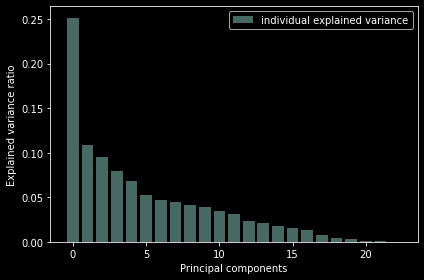

In [59]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(23), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [60]:
#Cumulative variance % retained
variance_retained_ratio=pca_2.explained_variance_ratio_.cumsum()
variance_retained_ratio

array([0.25168518, 0.36001646, 0.45552919, 0.53511813, 0.6037227 ,
       0.65674709, 0.70326423, 0.74842587, 0.79029194, 0.82886939,
       0.86390617, 0.89503132, 0.91807429, 0.93872491, 0.95608235,
       0.97126945, 0.98406225, 0.99163889, 0.99541885, 0.99849162,
       0.99958752, 1.        , 1.        ])

In [61]:
print(f'Variance retained by PC=1 {variance_retained_ratio[0]}')
print(f'Variance retained by PCs=2 {variance_retained_ratio[1]}')
print(f'Variance retained by PCs=3 {variance_retained_ratio[2]}')
print(f'Variance retained by PCs=4 {variance_retained_ratio[3]}')

Variance retained by PC=1 0.25168517829164316
Variance retained by PCs=2 0.36001646241363877
Variance retained by PCs=3 0.4555291858888576
Variance retained by PCs=4 0.5351181264901474


In [62]:
#PCA where n=??
pca_3 = PCA(n_components=2)
X = pca_3.fit_transform(scaled_data)

In [64]:
#Tabular representation of magnitude of each PC in explaining variance in each company
principal_contribution = pd.DataFrame(data = X
             , columns = ['principal component 1', 'principal component 2'])
principal_contribution

,principal component 1,principal component 2
0,-1.767045,1.580392
1,2.280301,-0.873234
2,0.361122,2.598158
3,0.849749,-0.553456
4,9.157979,-1.520074
...,...,...
80,-2.219014,-1.211519
81,-3.159389,-0.234802
82,-2.781129,-0.075157
83,-5.778915,-1.530808


In [103]:
new_df = pd.concat([principal_contribution, y_2['Y_variable']], axis = 1)
#new_df = pd.concat([principal_contribution, Call], axis=1)
new_df

,principal component 1,principal component 2,Y_variable
0,-1.767045,1.580392,1
1,2.280301,-0.873234,1
2,0.361122,2.598158,1
3,0.849749,-0.553456,1
4,9.157979,-1.520074,1
...,...,...,...
80,-2.219014,-1.211519,0
81,-3.159389,-0.234802,0
82,-2.781129,-0.075157,0
83,-5.778915,-1.530808,0


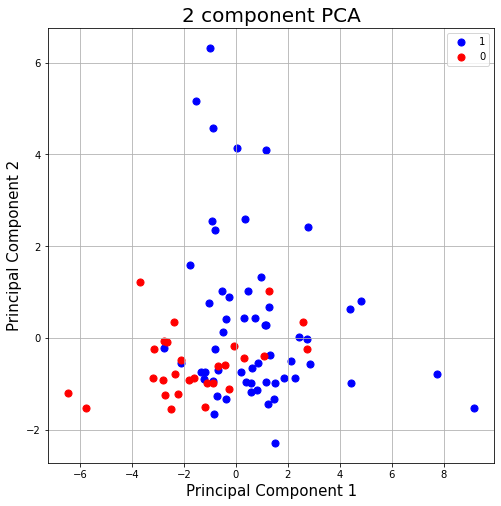

In [104]:
#Classification of the two main groups of companies
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 0]
colors = ['b','r']
for target, color in zip(targets,colors):
    indicesToKeep = new_df['Y_variable'] == target
    ax.scatter(new_df.loc[indicesToKeep, 'principal component 1']
               , new_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
#plt.xlim([-10, 10])
#ax.set_ylim([-10, 10])

In [105]:
#Machine learning using various tools
np.random.seed(20)
#Splitting data into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df.iloc[:,:2], new_df.iloc[:,2], test_size = 0.2, random_state=20, stratify=y)
#X or x = new_df.iloc[:,:??] #features
#y or y = new_df.iloc[:,??] #target

In [106]:
#forecasting using a KNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(7)

In [107]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [108]:
y_pred = model.predict(X_test)
print(y_pred)
#knc Actual values
y_test

[1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0]


30    1
32    1
68    0
6     1
11    1
19    1
56    1
13    1
43    1
10    1
46    1
83    0
60    0
55    1
72    0
66    0
77    0
Name: Y_variable, dtype: int64

In [109]:
#knc trading signal
for i in y_pred:
  if (i==0):
    print("sell")
  elif (i==1):
    print("buy")

buy
buy
buy
buy
buy
buy
buy
buy
buy
sell
sell
sell
sell
buy
sell
sell
sell


In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[5 1]
 [2 9]]
0.8235294117647058


In [111]:
#Forecasting using decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [112]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
tree = clf.fit(X_train, y_train)

In [113]:
#dtc Model predictions
tree_predictions = tree.predict(X_test)
print(tree_predictions)
#dtc Actual values
y_test

[1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0]


30    1
32    1
68    0
6     1
11    1
19    1
56    1
13    1
43    1
10    1
46    1
83    0
60    0
55    1
72    0
66    0
77    0
Name: Y_variable, dtype: int64

In [115]:
#How well did the model do on test dataset
print(tree.score(X_test,y_test))

0.7647058823529411


In [116]:
#dtc trading signal
for i in tree_predictions:
  if (i==0):
    print("sell")
  elif (i==1):
    print("buy")

buy
buy
buy
buy
buy
sell
buy
buy
buy
sell
sell
sell
sell
buy
sell
sell
sell


Model performance metrics

In [117]:
#Libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve

In [118]:
#ROC curves
# predict probabilities
lr_probs = tree.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

In [119]:
# calculate ROC AUC scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision tree: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Decision tree: ROC AUC=0.864


In [120]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

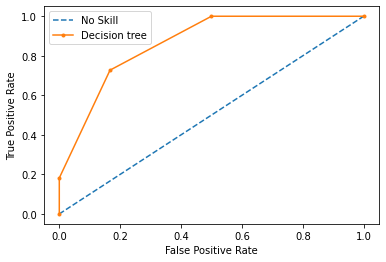

In [122]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [123]:
print('accuracy score', accuracy_score(y_test, tree_predictions))

accuracy score 0.7647058823529411


In [125]:
print('confusion matrix', confusion_matrix(y_test, tree_predictions))


confusion matrix [[5 1]
 [3 8]]


In [126]:
print('classification report', classification_report(y_test, tree_predictions))

classification report               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.89      0.73      0.80        11

    accuracy                           0.76        17
   macro avg       0.76      0.78      0.76        17
weighted avg       0.80      0.76      0.77        17



In [127]:
precision, recall, thresholds = precision_recall_curve(y_test, tree_predictions)
print(precision)
print(recall)
print(thresholds)

[0.64705882 0.88888889 1.        ]
[1.         0.72727273 0.        ]
[0 1]
